In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

import recal
import coeffproc
import slaterkoster
import initialization

In [2]:
#Parameters for the Recursion Calculation
#number of nearest neighbour vectors, 
#and max number nearest neighbours.
nx = 5
ny = 5
nz = 6
nnmx = 25
n_at = 75
ntype = 1
nndim = n_at

In [3]:
#Test equiv function.
a = np.array([1,2,3], dtype=np.float64, order='F')
b = np.array([1,2,3], dtype=np.float64, order='F')
c = np.array([1,2,4], dtype=np.float64, order='F')
print initialization.equiv(a,b)
print initialization.equiv(a,c)

1
0


In [4]:
bcc_crd = np.zeros([3,n_at], dtype=np.int32, order='F')
fcc_crd = np.zeros([3,n_at], dtype=np.int32, order='F')
nn = np.zeros([nndim, nnmx], dtype=np.int32, order='F')
izp = np.zeros([n_at], dtype=np.int32, order='F')

In [5]:
n_at_bcc = n_at
n_at_fcc = n_at
initialization.bcclat(bcc_crd,izp,n_at_bcc,nx,ny,nz,ntype)
initialization.fcclat(fcc_crd,izp,n_at_fcc,nx,ny,nz,ntype)
print 'BCC','\t', 'FCC'
print n_at_bcc, n_at_fcc
for R, species in zip(bcc_crd.T, fcc_crd.T):
    print R, species
print n_at

BCC 	FCC
75 75
[1 1 1] [2 1 1]
[1 1 3] [4 1 1]
[1 1 5] [1 2 1]
[1 3 1] [3 2 1]
[1 3 3] [5 2 1]
[1 3 5] [2 3 1]
[3 1 1] [4 3 1]
[3 1 3] [1 4 1]
[3 1 5] [3 4 1]
[3 3 1] [5 4 1]
[3 3 3] [2 5 1]
[3 3 5] [4 5 1]
[2 2 2] [1 1 2]
[2 2 4] [3 1 2]
[2 2 6] [5 1 2]
[2 4 2] [2 2 2]
[2 4 4] [4 2 2]
[2 4 6] [1 3 2]
[4 2 2] [3 3 2]
[4 2 4] [5 3 2]
[4 2 6] [2 4 2]
[4 4 2] [4 4 2]
[4 4 4] [1 5 2]
[4 4 6] [3 5 2]
[0 0 0] [5 5 2]
[0 0 0] [2 1 3]
[0 0 0] [4 1 3]
[0 0 0] [1 2 3]
[0 0 0] [3 2 3]
[0 0 0] [5 2 3]
[0 0 0] [2 3 3]
[0 0 0] [4 3 3]
[0 0 0] [1 4 3]
[0 0 0] [3 4 3]
[0 0 0] [5 4 3]
[0 0 0] [2 5 3]
[0 0 0] [4 5 3]
[0 0 0] [1 1 4]
[0 0 0] [3 1 4]
[0 0 0] [5 1 4]
[0 0 0] [2 2 4]
[0 0 0] [4 2 4]
[0 0 0] [1 3 4]
[0 0 0] [3 3 4]
[0 0 0] [5 3 4]
[0 0 0] [2 4 4]
[0 0 0] [4 4 4]
[0 0 0] [1 5 4]
[0 0 0] [3 5 4]
[0 0 0] [5 5 4]
[0 0 0] [2 1 5]
[0 0 0] [4 1 5]
[0 0 0] [1 2 5]
[0 0 0] [3 2 5]
[0 0 0] [5 2 5]
[0 0 0] [2 3 5]
[0 0 0] [4 3 5]
[0 0 0] [1 4 5]
[0 0 0] [3 4 5]
[0 0 0] [5 4 5]
[0 0 0] [2 5 5]
[0 0 0] [

In [6]:
n_at =len(filter(lambda x:x[0]!=0, fcc_crd.T))
print n_at
print izp

75
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


In [7]:
initialization.nncal(fcc_crd[:,:n_at],n_at,izp[:n_at],nn,initialization.fccbnd)
print 'Type,', 'Nearest Neighbours'
for n, i in zip(nn[:n_at,:13], izp[:]):
    print i,n

Type, Nearest Neighbours
1 [ 6  3  4 13 14 16  0  0  0  0  0  0  0]
1 [ 6  4  5 14 15 17  0  0  0  0  0  0  0]
1 [ 6  1  6 13 16 18  0  0  0  0  0  0  0]
1 [ 9  1  2  6  7 14 16 17 19  0  0  0  0]
1 [ 6  2  7 15 17 20  0  0  0  0  0  0  0]
1 [ 9  3  4  8  9 16 18 19 21  0  0  0  0]
1 [ 9  4  5  9 10 17 19 20 22  0  0  0  0]
1 [ 6  6 11 18 21 23  0  0  0  0  0  0  0]
1 [ 9  6  7 11 12 19 21 22 24  0  0  0  0]
1 [ 6  7 12 20 22 25  0  0  0  0  0  0  0]
1 [ 6  8  9 21 23 24  0  0  0  0  0  0  0]
1 [ 6  9 10 22 24 25  0  0  0  0  0  0  0]
1 [ 6  1  3 16 26 28  0  0  0  0  0  0  0]
1 [ 9  1  2  4 16 17 26 27 29  0  0  0  0]
1 [ 6  2  5 17 27 30  0  0  0  0  0  0  0]
1 [13  1  3  4  6 13 14 18 19 26 28 29 31]
1 [13  2  4  5  7 14 15 19 20 27 29 30 32]
1 [ 9  3  6  8 16 21 28 31 33  0  0  0  0]
1 [13  4  6  7  9 16 17 21 22 29 31 32 34]
1 [ 9  5  7 10 17 22 30 32 35  0  0  0  0]
1 [13  6  8  9 11 18 19 23 24 31 33 34 36]
1 [13  7  9 10 12 19 20 24 25 32 34 35 37]
1 [ 6  8 11 21 33 36  0  0  0

In [8]:
#iw species type list, unique interaction vectors.
iw = np.zeros([2,nnmx], dtype=np.int32, order='F')
vec = np.zeros([3,nnmx], dtype=np.int32, order='F')
#interaction map
mm = np.zeros([nndim, nnmx], dtype=np.int32, order='F')
#Hamiltonian Matrix
EE = np.zeros([5,5,nnmx],dtype=np.float64,order='F')
print n_at, nnmx

75 25


In [9]:
nm = 13
nmat = 13

In [10]:
initialization.mmcal(fcc_crd,nn,nm,initialization.equiv,izp,nmat,mm,vec,iw)
print 'Type,', 'Interaction Vector'
for i in range(n_at):
    mm[i,0]=izp[i]+12
for i,m in zip(izp, mm[:,:13]):
    print i, m

Type, Interaction Vector
1 [13  1  2  3  4  5  0  0  0  0  0  0  0]
1 [13  1  2  3  4  5  0  0  0  0  0  0  0]
1 [13  6  2  7  4  5  0  0  0  0  0  0  0]
1 [13  8  6  1  2  7  3  4  5  0  0  0  0]
1 [13  8  1  7  3  5  0  0  0  0  0  0  0]
1 [13  8  6  1  2  7  3  4  5  0  0  0  0]
1 [13  8  6  1  2  7  3  4  5  0  0  0  0]
1 [13  6  2  7  4  5  0  0  0  0  0  0  0]
1 [13  8  6  1  2  7  3  4  5  0  0  0  0]
1 [13  8  1  7  3  5  0  0  0  0  0  0  0]
1 [13  8  6  7  3  4  0  0  0  0  0  0  0]
1 [13  8  6  7  3  4  0  0  0  0  0  0  0]
1 [13  9 10  2  4  5  0  0  0  0  0  0  0]
1 [13 11  9 10  1  2  3  4  5  0  0  0  0]
1 [13 11 10  1  3  5  0  0  0  0  0  0  0]
1 [13 12 11  9 10  8  6  1  2  7  3  4  5]
1 [13 12 11  9 10  8  6  1  2  7  3  4  5]
1 [13 12  9 10  6  2  7  4  5  0  0  0  0]
1 [13 12 11  9 10  8  6  1  2  7  3  4  5]
1 [13 12 11 10  8  1  7  3  5  0  0  0  0]
1 [13 12 11  9 10  8  6  1  2  7  3  4  5]
1 [13 12 11  9 10  8  6  1  2  7  3  4  5]
1 [13 12  9  6  7  4  0  0  0

In [11]:
#Now load Hamiltonian and Self-Energy Matrices
#self energy matrices are stored for each type as nmat+ntype.
#i.e. vec list contains all non-zero interaction vectors
#and then all self-energy matrices.
for k in range(12):
    ii = iw[0,k]
    ij = iw[1,k]
    slaterkoster.slkode(vec[:,k],ii,ij,EE[:,:,k],initialization.fccbnd)

In [12]:
init_at = np.array([3,3,4],dtype=np.int32)

In [13]:
for i, at in enumerate(fcc_crd.T):
    if all([x==y for x,y in zip(init_at, at)]):
        init_index = i
    else:
        continue
print init_index, n_at

43 75


In [14]:
#Recursion vectors, and continued fraction co-efficients.
num_orbs = 5
rec_depth = 11
psi = np.zeros([5,100], dtype=np.float64, order='F')
pmn = np.zeros([5,100], dtype=np.float64, order='F')
izero = np.zeros([100], dtype=np.int32, order='F')
A = np.zeros([30], dtype=np.float64, order='F')
B2 = np.zeros([30], dtype=np.float64, order='F')
Ap = np.zeros([30,num_orbs], dtype=np.float64, order='F')
B2p = np.zeros([30,num_orbs], dtype=np.float64, order='F')

In [15]:
#initialize the common block
recal.blkrec.nn[:nndim,:nnmx] = nn
recal.blkrec.mm[:nndim,:nnmx] = mm
recal.blkrec.ee = EE
recal.blkrec.nat = n_at
recal.blkrec.np = 5
recal.blkrec.izero = izero

In [16]:
print 'Starting Atom: ', init_index, 'Coordinates: ', init_at
m_psi = 500
for iii in range(num_orbs):
    print 'Orbital: ', iii+1
    psi[:,:]=0.0
    pmn[:,:]=0.0
    izero[:]=0.0    
    B2[0]=1.0
    A[-1]=0.0
    psi[iii,init_index]=1.0
    izero[init_index]=1
    recal.blkrec.izero = izero
    recal.recal(recal.hop,np.reshape(psi,[m_psi],order='F'),np.reshape(pmn,[m_psi],order='F'),A[:rec_depth],B2[:rec_depth])
    Ap[:,iii] = A[:]
    B2p[:,iii] = B2[:]
    for a,b in zip(Ap[:rec_depth,iii],B2p[:rec_depth,iii]):
        print a, b
    print ''

Starting Atom:  43 Coordinates:  [3 3 4]
Orbital:  1
0.0 1.0
-0.00736283196951 0.002956431448
-0.0285672778271 0.00235335758106
-0.0160717767691 0.00179840210154
-0.0134217875419 0.00162690633388
-0.0112189406514 0.00156254010785
-0.0131123824651 0.00174530242468
-0.00671959704416 0.00153999427628
-0.0165180632731 0.00195674844325
-0.0123617749939 0.00173710870996
0.0 0.00168461791678

Orbital:  2
0.0 1.0
-0.00736283196951 0.002956431448
-0.0285672778271 0.00235335758106
-0.0203862488406 0.00205787026547
-0.0134712323468 0.00152931824856
0.000907045107654 0.00164360915288
-0.00596886083673 0.00155990013359
-0.00463771127303 0.00131672676638
-0.0128520647813 0.00134450111341
0.00128078706266 0.00160917437163
0.0 0.00158227105934

Orbital:  3
0.0 1.0
-0.00736283196951 0.002956431448
-0.0285672778271 0.00235335758106
-0.0203862488406 0.00205787026547
-0.0134712323468 0.00152931824856
0.000907045107654 0.00164360915288
-0.00596886083673 0.00155990013359
-0.00463771127303 0.00131672676638
-

In [17]:
npts = 201
ntabs = 301
alp = np.float64(0.5)
LL = 9
elo = -0.15
ehi = 0.15
eps = np.float64(5.0e-12)
acc = np.float64(1.0e-4)
nw = 20
de = (ehi-elo)/float(npts-1)
tabs = np.zeros([ntabs,num_orbs],dtype=np.float64,order='F')
AA = np.zeros([30],dtype=np.float64,order='F')
BB2 = np.zeros([30],dtype=np.float64,order='F')

In [18]:
#when LL is returned as negative recqd found too few roots.
#recsum sums up continued fraction coefficients.
coeffproc.recsum(Ap[:LL,:],B2p[:LL,:],LL,AA[:LL],BB2[:LL],eps,tabs,nw=301)
#AA[:LL]=Ap[:LL,0]
#BB2[:LL]=B2p[:LL,0]

In [19]:
#all the terminator parameters to be determined.
nbp1 = 5
tabs = np.zeros([ntabs,num_orbs],dtype=np.float64,order='F')
edge = np.zeros([nbp1],dtype=np.float64,order='F')
width = np.zeros([nbp1],dtype=np.float64,order='F')
weight = np.zeros([nbp1],dtype=np.float64,order='F')
am = np.zeros([30],dtype=np.float64,order='F')
bm2 = np.zeros([30],dtype=np.float64,order='F')
ic = np.zeros([20],dtype=np.float64,order='F')
wk = np.zeros([20,2,nbp1],dtype=np.float64,order='F')
bwk = np.zeros([301,4],dtype=np.float64,order='F')
iwk = np.zeros([30],dtype=np.float64,order='F')

In [20]:
coeffproc.termgn(AA[:LL],BB2[:LL],eps,acc,30,edge,width,weight,am[:LL],bm2[:LL],ic,wk,bwk,iwk[:LL])
print edge[0],width[0],weight[0],acc,nbp1,LL
for a,b in zip(AA[:LL],BB2):
    print a,b
for a,b in zip(am[:LL],bm2):
    print a,b


-0.0989228190182 0.175142490874 5.0 0.0001 5 9
5.42643187329e-18 5.0
-0.0058351277602 0.0026184790512
-0.0244354789105 0.00217561108997
-0.0235193626704 0.00207581379042
-0.017371034009 0.00175828508111
0.00237579175743 0.00197595686304
-0.00893754077525 0.00145290555751
-0.0106213426455 0.00150197207474
-0.020869873311 0.00178114012405
-0.0113515735814 5.0
-0.0113515735814 0.00191718075684
-0.0113515735814 0.00191718075684
-0.0113515735814 0.00191718075684
-0.0113515735814 0.00191718075684
-0.0113515735814 0.00191718075684
-0.0113515735814 0.00191718075684
-0.0113515735814 0.00191718075684
-0.0113515735814 0.00191718075684


In [21]:
#  TABULATE D.O.S. ETC. USING C.P.C. ROUTINES
NE = np.zeros([1],dtype=np.int32,order='F')
NQ = np.zeros([1],dtype=np.int32,order='F')
work = np.zeros([20,4],dtype=np.float64,order='F')
for I in range(npts):
    E = elo + float(I-1)*de
    tabs[I,0] = E
    tabs[I,4] = coeffproc.dencrs(tabs[I,0],AA[:LL],BB2[:LL],edge[0],width[0],weight[0],am[:LL],bm2[:LL],LL,1)
    tabs[I,1] = coeffproc.denqd(tabs[I,0],tabs[I,0],AA[:LL],BB2[:LL],alp,eps,work,NQ,NE,iwk[:LL],LL,20)
    if (NE<0): raise ValueError('DENQD failed with {} at E= {}'.format(NE, tabs[I,0]))
    tabs[I,2] = work[NE,1]*(alp-1.0)
    tabs[I,3] = work[NE,0]*tabs[I,2]
    for J in range(NE):
        tabs[I,2] = tabs[I,2]+ work[J,1]
        tabs[I,3] = tabs[I,3]+work[J,1]*work[J,0]

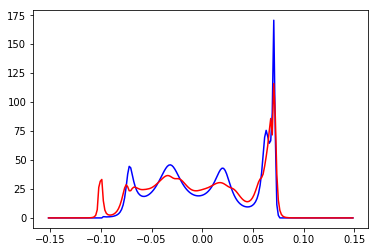

In [22]:
plt.plot(tabs[:npts,0],tabs[:npts,4],'b-')
plt.plot(tabs[:npts,0],tabs[:npts,1],'r')
#plt.axis([-0.1,0.1,0.0,25])

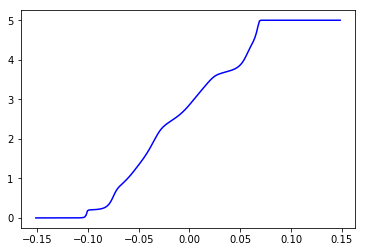

In [23]:
plt.plot(tabs[:npts,0],tabs[:npts,2],'b-')
#plt.axis([-0.1,0.1,0.0,25])

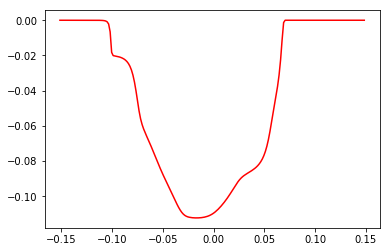

In [24]:
plt.plot(tabs[:npts,0],tabs[:npts,3],'r-')

In [29]:
eb = np.zeros([2],dtype=np.float32,order='F')
for m in range(1,4+1):
    eb[0] = tabs[0,0]
    dum = eb[0]
    eb[1] = tabs[-1,0]
    n_e = np.float64(m)
    ift = 60
    ef = coeffproc.fenval(n_e,AA[:LL],BB2[:LL],LL,acc,eps,eb,work,iwk[:nw],ift,nc=1)
    ift = 60
    eb[1] = tabs[-1,0]
    eb[0] = dum
    efac = coeffproc.fenval(n_e,Ap[:LL,:],B2p[:LL,:],LL,acc,eps,eb,work,iwk[:nw],ift,nc=5)
    eb[0] = efac
    print eb
    print 'Num. electrons: {}, E_f: {}, E_f accurate: {}'.format(n_e,ef,efac)

[-0.04960048  0.        ]
Num. electrons: 1.0, E_f: -0.0500087718608, E_f accurate: -0.0496004818628
[-0.02018583  0.        ]
Num. electrons: 2.0, E_f: -0.0196343683388, E_f accurate: -0.0201858327016
[ 0.  0.]
Num. electrons: 3.0, E_f: 6.95312043128e-310, E_f accurate: 6.95312043128e-310
[ 0.  0.]
Num. electrons: 4.0, E_f: 6.95312043128e-310, E_f accurate: 6.95312043128e-310
